In [1]:
import pandas as pd


In [2]:
# Import data from the CSV file to a pandas DataFrame.

player_df = pd.read_csv('player_data.txt')

In [3]:
# Print out the first five rows of the player_df DataFrame.
player_df.head(20)

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,NaN,NaN,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,NaN,NaN,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,NaN,NaN,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,9,NaN,NaN,NaN,NaN,NaN,54.0,31.7,0.577,24.6,14.4,35.7,2.5,14.1,-4.6,4.68
9,10,1468.0,1400.9,93.7,NaN,NaN,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN


In [4]:
# Total up the number of NaN values in each row of the DataFrame.
player_df.isna()

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True
8,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True


In [5]:
# Total up the number of NaN values in each row of the DataFrame.
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
Unnamed: 4     46
Unnamed: 5     46
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [6]:
#Print out the information about the Dataframe
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


Drop columns
To drop columns, you'll use the dropna() method. Like isna(), dropna() looks for NaN values. But it goes a step further and removes either the rows or the columns that contain NaN values. Start by setting some parameters to the method:

By default, dropna() removes rows, so specify that you want to remove columns by using the axis parameter.
The dropna() method usually returns a new DataFrame. Use the inplace parameter to tell it to drop these columns in the original player_df DataFrame.
You also want dropna() to remove only columns in which all of the values are missing. So set the how parameter to 'all'.

In [7]:
#Drop columns that have no values
#putting the axxis=columns will remove columns
player_df.dropna(axis='columns', inplace=True, how='all')
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [8]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   GP           39 non-null     float64
 5   MPG          40 non-null     float64
 6   TS%          45 non-null     float64
 7   AST          45 non-null     float64
 8   TO           45 non-null     float64
 9   USG          45 non-null     float64
 10  ORR          45 non-null     float64
 11  DRR          45 non-null     float64
 12  REBR         45 non-null     float64
 13  PER          36 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 5.2 KB


Drop rows
You should also address the possibility that an entire row is missing values. That is, one of the players in the DataFrame might have no stats. You can try to address this missing row as you did last time, by using dropna(). But this time, use the method's default row-based behavior.

In [9]:
# Drop rows that have no values.
player_df.dropna(inplace=True, how='all')
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [10]:
# Show the entire DataFrame.
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,9,NaN,NaN,NaN,54.0,31.7,0.577,24.6,14.4,35.7,2.5,14.1,-4.6,4.68
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN


Now you see that three rows are missing the same three values. Another row is missing 10 values. This information indicates two things:

The dataset likely comes from two datasets that were joined together, and both of these earlier datasets had missing rows.
You'll need to use critical thinking to determine how to remove these rows.
The dataset is small enough that you could manually drop the problem rows. But that shortcut wouldn't give you practice dealing with larger datasets, where manual removal isn't practical. So use the built-in pandas methods instead.

The how parameter in dropna() can be set to only 'any' or 'all'. Neither of those settings will get you what you need. Instead, use the thresh parameter.

The thresh parameter refers to threshold. This parameter lets you set the minimum number of non-NaN values a row or column needs to avoid being dropped by dropna(). To remove specific rows from the DataFrame, set thresh to 12.

In [11]:
# Drop all rows that don't have at least 12 non-NaN values.
player_df.dropna(inplace=True, thresh=12)
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

Because you've dropped rows, the index in the DataFrame is compromised. You see this problem if you print out the first 10 rows of the DataFrame:

In [12]:
# Print the first 10 rows of the player_df DataFrame.
player_df.head(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
10,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


You see that the index counts 0 through 10, skipping 8. The row that had the index of 8 was dropped because it had more than two NaN values. In the 14 columns, the rows that had three or more NaN values didn't meet the threshold of 12 you set when you dropped rows earlier.

To fix this problem, reset the index for the DataFrame. This fix saves you from problems down the road when you're working with the DataFrame. While you're at it, take a look at the now smaller DataFrame.

In [13]:
# Renumber the DataFrame index to account for the dropped rows.
player_df.reset_index(drop=True, inplace=True)
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   points       42 non-null     float64
 2   possessions  42 non-null     float64
 3   team_pace    42 non-null     float64
 4   GP           36 non-null     float64
 5   MPG          37 non-null     float64
 6   TS%          42 non-null     float64
 7   AST          42 non-null     float64
 8   TO           42 non-null     float64
 9   USG          42 non-null     float64
 10  ORR          42 non-null     float64
 11  DRR          42 non-null     float64
 12  REBR         42 non-null     float64
 13  PER          33 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.7 KB


Check for outliers

Outliers are data values so far outside the distribution of other values that they bring into question whether they even belong in the dataset. Outliers often arise from data errors or other undesirable noise. You'll always need to check for and deal with possible outliers before you analyze the data.

A quick way to identify outliers is to use the pandas describe() function:


In [14]:
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
9,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


In [15]:
player_df.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


Here you see, for example, that the mean for all 42 players is 1592.38 points. But look at the numbers for min (183), 25% (1390.75), 50% (1680.0), 75% (1826.25), and max (2062). Here, the min points (183) might be an outlier. You can use box plots to visualize the values and determine possible outliers.

Create box plots for columns

The traditional tool for probing for outlying data values is the box plot. The box in box plot refers to a box drawn around the range of data from the 25th percentile to the 75th percentile. (These percentiles demarcate important quarters of the data. Their range is called the interquartile range.) This box is the middle 50% of the data values for a given variable (a column in a DataFrame). You use another line to mark the median of the data, which is the 50th percentile.

The box plot is also called a box-and-whisker plot because you draw a T shape above and below the box to encompass the maximum and minimum values of the data, excluding outliers. This last part is important for your purposes because it lets you graphically identify outliers.

Ideally, you would produce the box plots for your columns in a single matrix that you can easily scan. Unfortunately, no single function produces multiple box plots, so you'll write a for loop instead.

Because of how the Seaborn library in Python works, you need to explicitly state the cell in the matrix where you want to render each box plot. Use the Python floor-division operator (//) to divide the 13 columns of interest (you don't need to look at ID) into rows. Use the modulo operator (%) to derive the column.

First, import the Matplotlib and Seaborn libraries into your notebook:




#python -m pip install -U pip

#python -m pip install -U matplotlib

#pip install seaborn

#python -m pip install seaborn

In some cases, an installation of seaborn will appear to succeed, but trying to import it will raise an error with the message "No module named seaborn". This usually means that you have multiple Python installations on your system and that your pip or conda points towards a different installation than where your interpreter lives. Resolving this issue will involve sorting out the paths on your system, but it can sometimes be avoided by invoking pip with python -m pip install seaborn

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Now you can:

Create a list of the column names, excluding ID. Use the list to find specific values within each row.

Create a matrix of subplots so you have one figure that shows all 13 columns.

Add padding around the subplots to make them easier to read. 

Create a box plot based on the data in each column, across all of the rows.

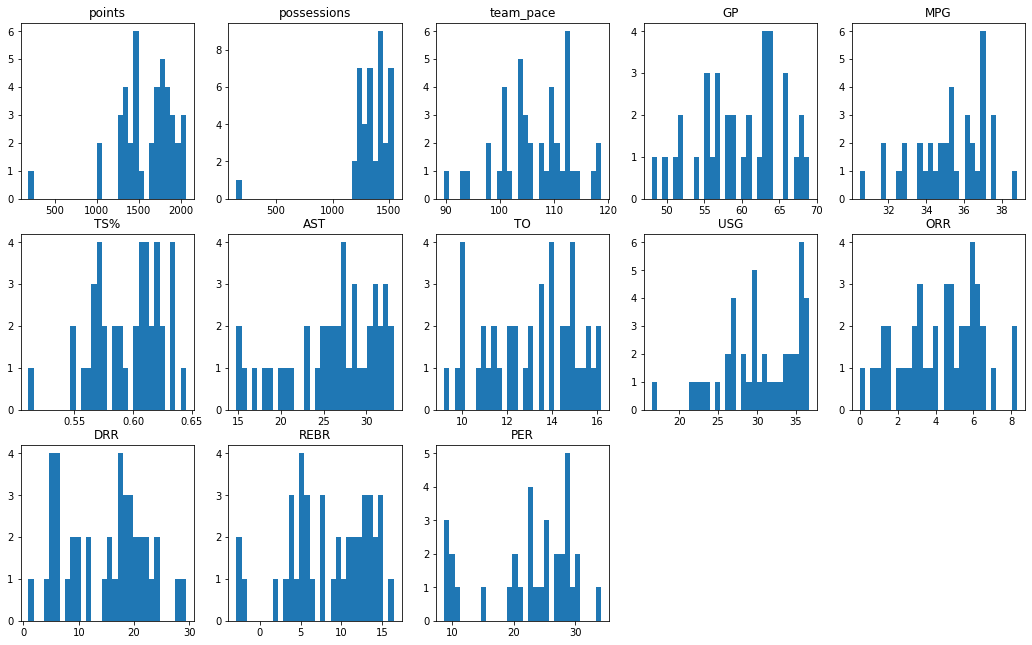

In [17]:
# Create a list of all column names, except for ID.
cols = list(player_df.iloc[:, 1:])

fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)

for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(player_df[cols[i]], bins=30)
    plt.title(cols[i])


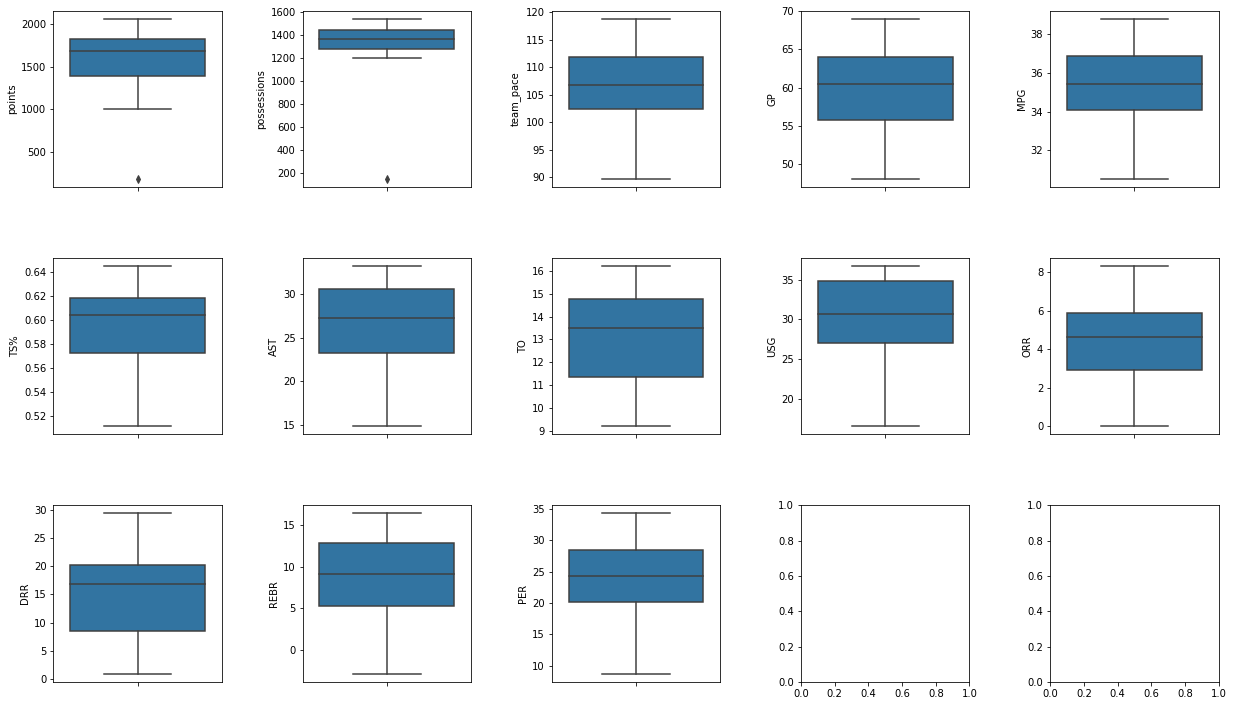

In [18]:
cols = list(player_df.iloc[:, 1:])

#print(cols)
###['points', 'possessions', 'team_pace', 'GP', 'MPG', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR', 'REBR', 'PER']

# Create a 3x5 matrix of subplots.
#fig and axes are variables that can be change
#3, 5 = 3 rows 5 columns of boxes
#figsize = size of each graph area
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
#fmlfig, fmlaxes = plt.subplots(3, 3, figsize=(20, 13))

# Create padding around subplots to make the axis labels readable.
#spaces between each graph
fig.tight_layout(pad=5.0)
#fmlfig.tight_layout(pad=5.0)


#sns.boxplot((ax=fmlaxes[0, 0], y=player_df[cols[0]]))
# Loop over the columns of the DataFrame and create a box plot for each one.
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=player_df[cols[i]])

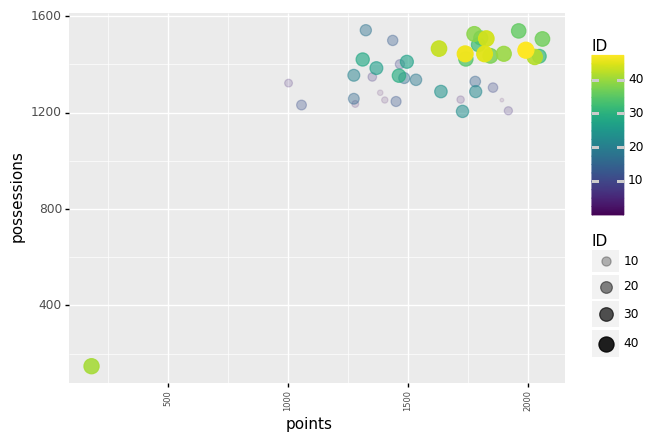

<ggplot: (177201085835)>

In [19]:
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *

(ggplot(player_df)         # defining what data to use
 + aes(x='points', y='possessions', color='ID', size='ID', fill='ID', alpha='ID')    # defining what variable to use
 + geom_point() # defining the type of plot to use
 #+ facet_wrap(['ID'])
 + theme(axis_text_x = element_text(angle=90, size=6))
)

In [20]:
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
9,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


In [21]:
# Identify the index number of the row that has the lowest value in 'points'.
# Identify OUTLIERS
# you can use the idxmin() method on both columns

points_outlier = player_df['points'].idxmin()
points_outlier

35

In [22]:
# Identify the index number of the row that has the lowest value in 'possession'.
possession_outlier = player_df['possessions'].idxmin()
possession_outlier

35

In [23]:
# Drop the row that has the outlying values for 'points' and 'possessions'.
player_df.drop(player_df.index[points_outlier], inplace=True)

# Check the end of the DataFrame to ensure that the correct row was dropped.
player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
36,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
37,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
38,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
39,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
40,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
41,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


In [24]:
#Reset index after dropping outliers
player_df.reset_index(drop=True, inplace=True)

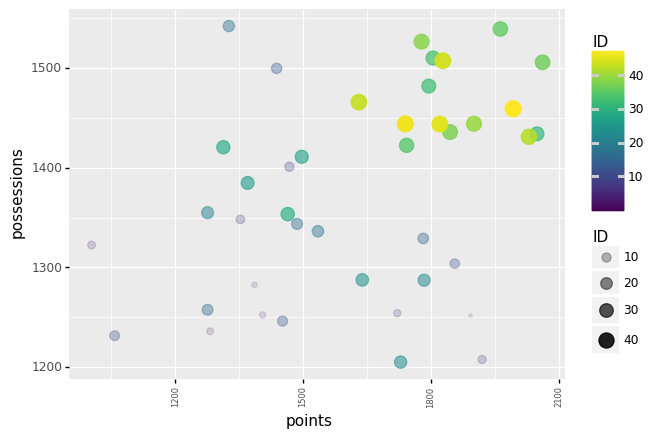

<ggplot: (177201168803)>

In [25]:
#run another scatter plot after dropping outliers

(ggplot(player_df)         # defining what data to use
 + aes(x='points', y='possessions', color='ID', size='ID', fill='ID', alpha='ID')    # defining what variable to use
 + geom_point() # defining the type of plot to use
 #+ facet_wrap(['ID'])
 + theme(axis_text_x = element_text(angle=90, size=6))
)

In [26]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           41 non-null     int64  
 1   points       41 non-null     float64
 2   possessions  41 non-null     float64
 3   team_pace    41 non-null     float64
 4   GP           35 non-null     float64
 5   MPG          36 non-null     float64
 6   TS%          41 non-null     float64
 7   AST          41 non-null     float64
 8   TO           41 non-null     float64
 9   USG          41 non-null     float64
 10  ORR          41 non-null     float64
 11  DRR          41 non-null     float64
 12  REBR         41 non-null     float64
 13  PER          32 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.6 KB


In [27]:
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
9,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


In [28]:
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

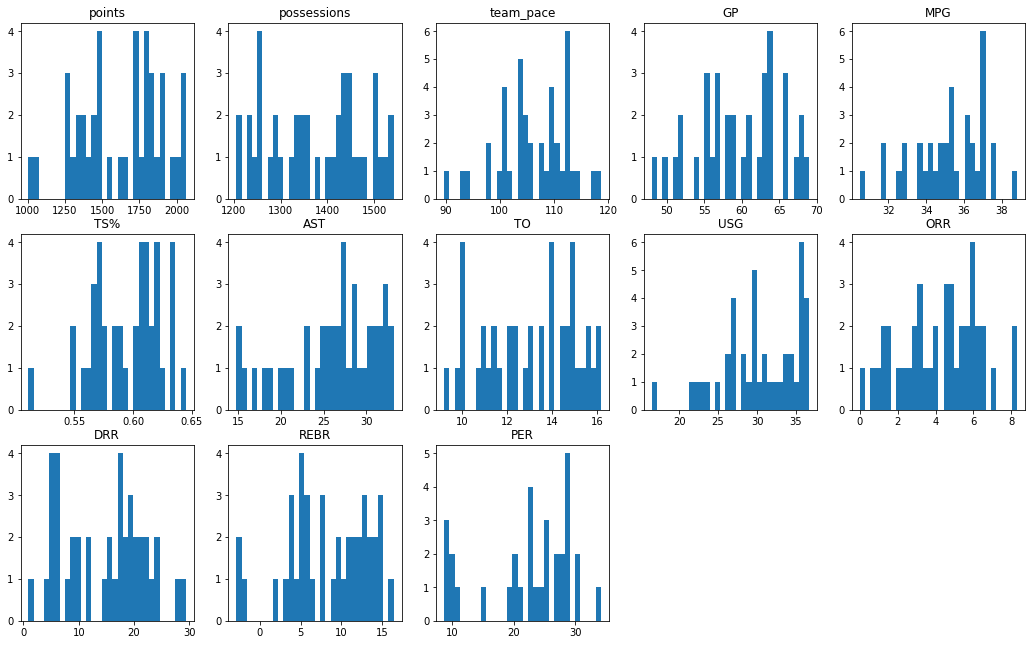

In [29]:
# Create a list of all column names, except for 'ID'.
cols = list(player_df.iloc[:, 1:])

# Define the size for the plots and add padding around them.
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)

# Loop over the columns in the DataFrame and create a histogram for each one.
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(player_df[cols[i]], bins=30)
    plt.title(cols[i])

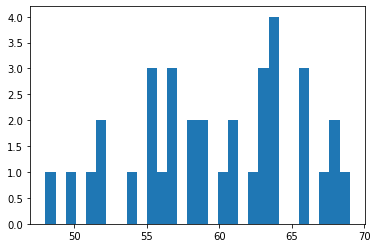

In [30]:
# Create a histogram for the 'GP' column.
plt.hist(player_df['GP'], bins=30);

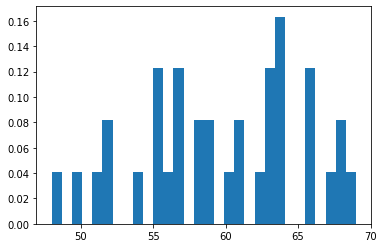

In [31]:
# Create a histogram for the 'GP' column, this time as a probability density.
plt.hist(player_df['GP'], density=True, bins=30);

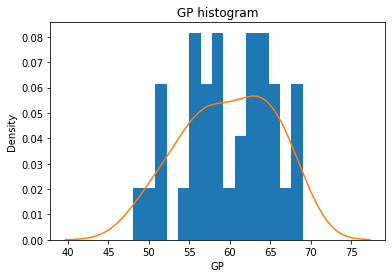

In [32]:
# Plot the KDE for 'GP' over the probability-density histogram.
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

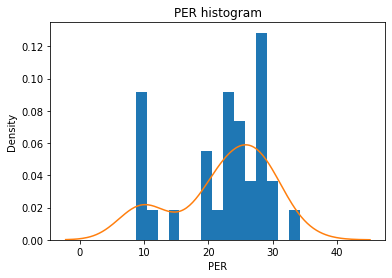

In [33]:
# Plot the KDE for 'GP' over the probability-density histogram.
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER histogram')
sns.kdeplot(player_df['PER']);

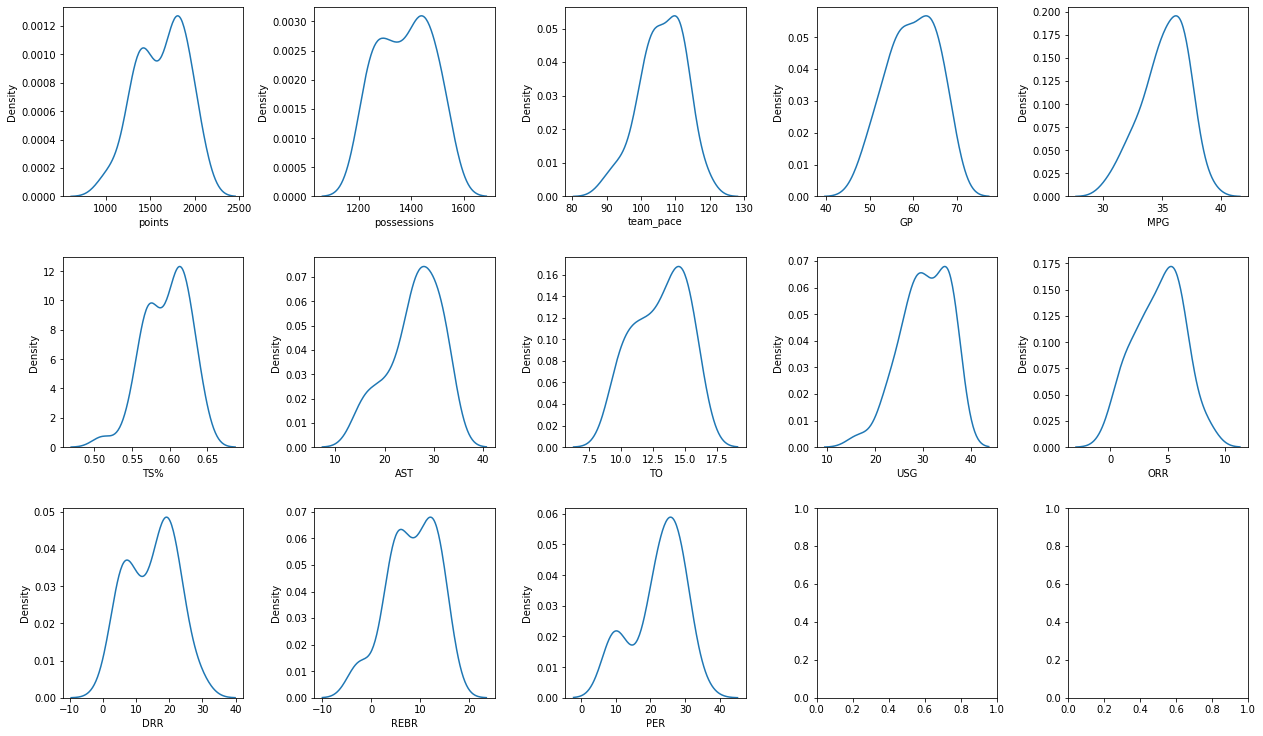

In [34]:
# Create a list of all column names, except for 'ID'.
cols = list(player_df.iloc[:, 1:])

# Create a 3x5 matrix of subplots and add padding around them for readability.
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.tight_layout(pad=4.0)

# Loop over the columns of the DataFrame and create a KDE for each one.
for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//5, i%5], data=player_df[cols[i]])

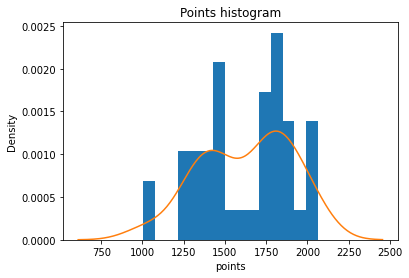

In [35]:
# Plot the KDE for 'points' over the probability-density histogram.
plt.hist(player_df['points'], density=True, bins=15)
plt.title('Points histogram')
sns.kdeplot(player_df['points']);

In [36]:
#Take a look at the rows where players scored more than 1,600 points:
player_df.loc[player_df['points'] >= 1600].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           23 non-null     int64  
 1   points       23 non-null     float64
 2   possessions  23 non-null     float64
 3   team_pace    23 non-null     float64
 4   GP           20 non-null     float64
 5   MPG          20 non-null     float64
 6   TS%          23 non-null     float64
 7   AST          23 non-null     float64
 8   TO           23 non-null     float64
 9   USG          23 non-null     float64
 10  ORR          23 non-null     float64
 11  DRR          23 non-null     float64
 12  REBR         23 non-null     float64
 13  PER          20 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.7 KB


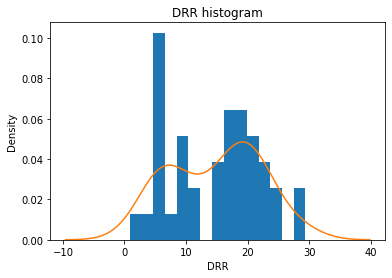

In [37]:
# Plot the KDE for 'DRR' over the probability-density histogram.
plt.hist(player_df['DRR'], density=True, bins=15)
plt.title('DRR histogram')
sns.kdeplot(player_df['DRR']);

In [38]:
player_df.loc[(player_df['points'] >= 1600) & (player_df['DRR'] >= 15)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           18 non-null     int64  
 1   points       18 non-null     float64
 2   possessions  18 non-null     float64
 3   team_pace    18 non-null     float64
 4   GP           15 non-null     float64
 5   MPG          16 non-null     float64
 6   TS%          18 non-null     float64
 7   AST          18 non-null     float64
 8   TO           18 non-null     float64
 9   USG          18 non-null     float64
 10  ORR          18 non-null     float64
 11  DRR          18 non-null     float64
 12  REBR         18 non-null     float64
 13  PER          16 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.1 KB


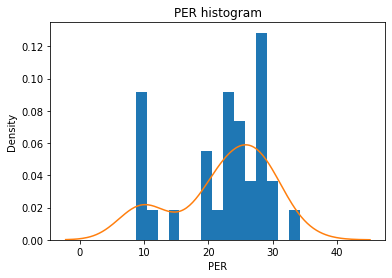

In [39]:
# Plot the KDE for 'PER' over the probability-density histogram.
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER histogram')
sns.kdeplot(player_df['PER']);

In [40]:
player_df.loc[(player_df['points'] >= 1600) & (player_df['DRR'] >= 15) & (player_df['PER'] >= 17)]

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
26,31,2049.0,1434.0,110.0,64.0,38.8,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.44
27,32,1795.0,1481.8,112.1,62.0,35.4,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.34
28,33,1805.0,1509.9,108.6,64.0,35.4,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.41
30,35,1963.0,1539.1,117.4,NaN,NaN,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.16
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40


In [41]:
player_df.loc[player_df['ID'] == 34]

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
29,34,1743.0,1422.4,112.9,64.0,36.3,0.619,30.9,15.6,34.5,5.9,18.9,14.8,NaN


In [42]:
# Initialize the list to house the player data.
pop_list = []

# If the ID number is 30 or less, it's a human player; otherwise, it's a Tune Squad player.
for id in player_df['ID']:
    if id <= 30:
        pop_list.append('player'+str(id))
    else:
        pop_list.append('tune_squad'+str(id%30))

pop_list

['player1',
 'player2',
 'player3',
 'player4',
 'player5',
 'player6',
 'player7',
 'player8',
 'player10',
 'player11',
 'player12',
 'player13',
 'player14',
 'player15',
 'player16',
 'player17',
 'player18',
 'player19',
 'player21',
 'player22',
 'player23',
 'player24',
 'player26',
 'player27',
 'player28',
 'player29',
 'tune_squad1',
 'tune_squad2',
 'tune_squad3',
 'tune_squad4',
 'tune_squad5',
 'tune_squad6',
 'tune_squad7',
 'tune_squad8',
 'tune_squad9',
 'tune_squad11',
 'tune_squad12',
 'tune_squad13',
 'tune_squad14',
 'tune_squad15',
 'tune_squad16']

In [43]:
# Assign this list as the values for the new player column in the DataFrame.
player_df['player'] = pop_list
player_df.head()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,player
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90,player1
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30,player2
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN,player3
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35,player4
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38,player5


In [44]:
# Create list of all DataFrame column names but the last one.
column_list = list(player_df.iloc[:, :-1])

# Make player the second item in the list.
column_list.insert(1, 'player')

# Reassign the columns in the player_df DataFrame in this new order.
player_df = player_df[column_list]

# Verify that the columns are ordered the way you expect.
player_df.head()

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,player2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,player3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,player4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,player5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


In [45]:
# Recheck the totals for NaN values by row.
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

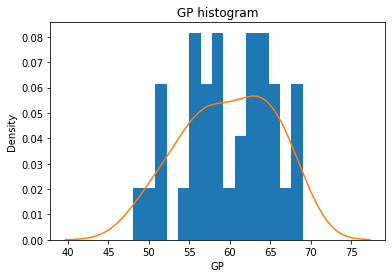

In [46]:
#Exercise - Data manipulation part 2 - Impute missing values for columns

# Plot the KDE for 'GP' over the probability-density histogram.
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

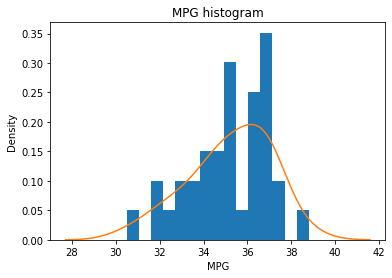

In [47]:
# Plot the KDE for 'MPG' over the probability-density histogram.
plt.hist(player_df['MPG'], density=True, bins=15)
plt.title('MPG histogram')
sns.kdeplot(player_df['MPG']);

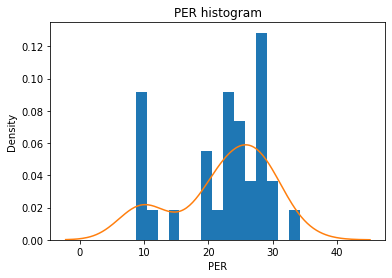

In [48]:
# Plot the KDE for 'PER' over the probability-density histogram.
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER histogram')
sns.kdeplot(player_df['PER']);

In [49]:
# Replace the missing values in 'GP' and 'MPG' with the mean values of the respective columns.
player_df[['GP','MPG']] = player_df[['GP','MPG']].fillna(value=player_df[['GP','MPG']].mean())

# Recheck the totals for NaN values by row to ensure that the expected missing values are filled in.
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

Cross-validate the R2 scores for the model
Here you'll use a 10-fold cross validation. That is, Python will iterate through the data 10 times, reserving 10 percent of the data for testing and training on the other 90 percent of the data each time. You'll also plot a histogram of the results.

 Note

As you read the Python code, keep in mind that you define the predictors as X by longstanding convention. For the purposes of building your model, you should use only rows that contain NaN values (player_df.dropna(how='any')). Then use the iloc DataFrame attribute to select columns by number rather than name (iloc[:, 4:-1]). Finally, use only the values from the resulting DataFrame slice rather than the slice in DataFrame form. (Here, the to_numpy() method is preferred over the DataFrame values attribute, per the pandas.DataFrame.values documentation).

Mean r2 score: 0.9995
10% of r2 scores are between 0.9985 and 0.9987
10% of r2 scores are between 0.9987 and 0.9988
10% of r2 scores are between 0.9995 and 0.9996
10% of r2 scores are between 0.9996 and 0.9997
60% of r2 scores are between 0.9997 and 0.9998


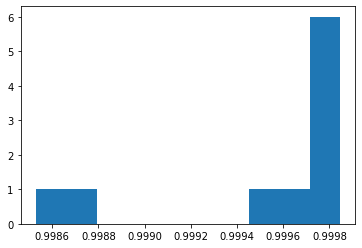

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Define the variables for the regression model as those rows that have no missing values.
X = player_df.dropna(how='any').iloc[:, 5:-1].to_numpy()
y = player_df.dropna(how='any').iloc[:, -1]

# Define the regression model.
lin_reg = LinearRegression()

# Use the scikit-learn cross-validation function to fit this model 10 times and return the R2 scores.
scores = cross_val_score(lin_reg, X, y, cv=10, scoring='r2')

# Define the histogram of the scores and copy out information from the histogram.
entries, bin_edges, patches = plt.hist(scores, bins=10);

# Print out the mean and the results from the histogram.
print('Mean r2 score: {:.4f}'.format(scores.mean()))
for i in range(len(entries)):
    if entries[i] > 0:
        print('{:.0f}% of r2 scores are between {:.4f} and {:.4f}'.format(entries[i]*100/len(entries), 
        bin_edges[i], 
        bin_edges[i+1]))

In [51]:
# Fit the same regression model, this time using all of the available data.
lin_reg.fit(X, y)

LinearRegression()

In [52]:
# Create and display a mask of rows in the DataFrame. Rows should contain at least one NaN value.
mask = player_df.isnull().any(axis=1)
mask

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29     True
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40    False
dtype: bool

In [53]:
# Apply the mask defined earlier to show the contents of specific columns of rows that contain NaN values.
player_df.loc[mask].iloc[:, 5:-1]

,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR
2,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8
7,57.000000,35.208333,0.574,24.4,11.3,26.3,5.5,5.8,-2.2
8,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9
11,59.771429,31.700000,0.584,32.4,14.7,16.5,3.2,19.0,4.1
15,59.771429,34.900000,0.603,26.2,11.1,36.7,3.0,14.3,5.3
20,61.000000,35.208333,0.645,20.6,13.1,31.5,4.0,12.0,5.2
24,48.000000,35.100000,0.569,19.0,10.9,29.2,4.6,17.7,5.2
29,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8
37,64.000000,36.500000,0.618,31.3,14.0,34.9,5.9,21.3,14.5


In [54]:
# Impute the missing values in 'PER' by using the regression model and mask.
player_df.loc[mask, 'PER'] = lin_reg.predict(player_df.loc[mask].iloc[:, 5:-1])

# Recheck the DataFrame for rows that have missing values.
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            0
dtype: int64

In [55]:
# Display the entire DataFrame.
player_df

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.000000,33.900000,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.900000
1,2,player2,1386.0,1282.5,110.5,58.000000,32.500000,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.300000
2,3,player3,1405.0,1252.3,105.8,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8,16.595759
3,4,player4,1282.0,1235.9,100.7,54.000000,37.600000,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.350000
4,5,player5,1721.0,1254.0,105.7,59.000000,30.500000,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.380000
5,6,player6,1004.0,1322.4,102.1,57.000000,36.300000,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.830000
6,7,player7,1920.0,1207.6,109.8,55.000000,37.000000,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.710000
7,8,player8,1353.0,1348.1,112.2,57.000000,35.208333,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,8.717454
8,10,player10,1468.0,1400.9,93.7,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,3.115350
9,11,player11,1856.0,1303.8,93.4,55.000000,33.600000,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.670000


In [56]:
player_df.to_csv('player_data_final.csv', index=False)

In [57]:
# Import the CSV file and create a DataFrame.
player_df_final = pd.read_csv('player_data_final.csv')

In [58]:
#Let's start by creating a DataFrame that represents only the Tune Squad players. This code chooses all rows, starting at row 27
# (index 26, because the DataFrame is zero-based), and all columns:

# Create a DataFrame of only Tune Squad players.
ts_df = player_df_final.iloc[26: , :]
ts_df

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
26,31,tune_squad1,2049.0,1434.0,110.0,64.000000,38.800000,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.440000
27,32,tune_squad2,1795.0,1481.8,112.1,62.000000,35.400000,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.340000
28,33,tune_squad3,1805.0,1509.9,108.6,64.000000,35.400000,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.410000
29,34,tune_squad4,1743.0,1422.4,112.9,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8,29.853138
30,35,tune_squad5,1963.0,1539.1,117.4,59.771429,35.208333,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.160000
31,36,tune_squad6,2062.0,1505.7,111.5,59.771429,37.000000,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.860000
32,37,tune_squad7,1845.0,1435.7,113.1,69.000000,36.900000,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.260000
33,38,tune_squad8,1778.0,1526.4,109.3,66.000000,34.900000,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.650000
34,39,tune_squad9,1901.0,1444.1,109.7,67.000000,36.500000,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.120000
35,41,tune_squad11,2030.0,1431.0,112.3,68.000000,37.000000,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.070000


In [59]:
# Import Tune Squad player names.
ts_name_df = pd.read_csv('tune_squad.csv', sep='\t')
ts_name_df

,ID,player
0,31,Sylvester
1,32,Marvin the Martian
2,33,Road Runner
3,34,Foghorn Leghorn
4,35,Bugs Bunny
5,36,Elmer Fudd
6,37,Lola Bunny
7,38,Porky Pig
8,39,Tasmanian Devil
9,40,Yosemite Sam


In [60]:
# Merge the two DataFrames.
ts_df = pd.merge(ts_df, ts_name_df, on='ID', how='left', suffixes=('_type', '_name'))
ts_df.head()

,ID,player_type,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,player_name
0,31,tune_squad1,2049.0,1434.0,110.0,64.000000,38.800000,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.440000,Sylvester
1,32,tune_squad2,1795.0,1481.8,112.1,62.000000,35.400000,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.340000,Marvin the Martian
2,33,tune_squad3,1805.0,1509.9,108.6,64.000000,35.400000,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.410000,Road Runner
3,34,tune_squad4,1743.0,1422.4,112.9,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8,29.853138,Foghorn Leghorn
4,35,tune_squad5,1963.0,1539.1,117.4,59.771429,35.208333,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.160000,Bugs Bunny


In [61]:
# Rearrange the columns to put the ID and player_name columns next to each other.
column_list = list(ts_df)

player_name = column_list.pop()
column_list[1] = player_name

ts_df = ts_df[column_list]
ts_df.head()

,ID,player_name,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,31,Sylvester,2049.0,1434.0,110.0,64.000000,38.800000,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.440000
1,32,Marvin the Martian,1795.0,1481.8,112.1,62.000000,35.400000,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.340000
2,33,Road Runner,1805.0,1509.9,108.6,64.000000,35.400000,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.410000
3,34,Foghorn Leghorn,1743.0,1422.4,112.9,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8,29.853138
4,35,Bugs Bunny,1963.0,1539.1,117.4,59.771429,35.208333,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.160000


In [62]:
#To make this process easier, let's create a lookup pandas Series for each stat's standard deviations. A Series basically is a single-column DataFrame. Set the stat names as the Series index to make looking them up easier later on.

# Create a list of only the column names we are interested in.
game_stat_cols = list(ts_df.iloc[:, 7:-1])
game_stat_stdevs = []

# Create a list of standard deviations for each stat.
for stat in game_stat_cols:
    game_stat_stdevs.append(ts_df[stat].std())

# Create a Series of the standard deviations, with the stat names as the index.
stdev_s = pd.Series(game_stat_stdevs, index=game_stat_cols)
stdev_s

TS%     0.008262
AST     2.140494
TO      0.797197
USG     1.892718
ORR     1.139465
DRR     3.017962
REBR    1.802564
dtype: float64

Train a machine learning model based on player data
To train a machine learning model to predict a player PER by using specific player stats for a simulated game, we'll use all the data that we initially downloaded, including the human player data. To do this, we'll need to split our data into two parts:

X: The input data we use to predict y
y: The output value that you want the machine learning model to predict
The input data (X) is all the data that you want your machine learning model to use to predict the output (y). In this case, we want X to represent the seven columns we are especially interested in. The output data (y) is the number that we want to predict when all the columns in X are considered. In our case, y will be PER. To create these two variables, we just need to grab the last eight columns, minus the last column, and use that for X. We'll grab only the last column to use for y.

In [ ]:
# Import the models and libraries we need.
from sklearn.linear_model import LinearRegression
from numpy.random import randn

# Get the dependent and independent variables for modeling the PER.
X = player_df_final.iloc[:, 7:-1].to_numpy()
y = player_df_final.iloc[:, -1]

Next, we need to train, or fit, the machine learning model. We're using the scikit-learn LinearRegression library, which is a pre-written linear regression machine learning model that will automatically learn how to predict y based on X. For more information about how this training works, you can check out the Developer's Intro to Data Science video series and other Microsoft Learn modules about data science.

In [ ]:
# Define and fit the model.
lin_reg = LinearRegression()
lin_reg.fit(X, y)